# Modelleren - analyse opdracht

## Simulatie basis model

- dm/dt = -m(r0 - c) + c - kel/koff * m
- dc/dt = m(r0 - c) - c

In [1]:
# prepare environment
import numpy as np
import matplotlib.pyplot as plt

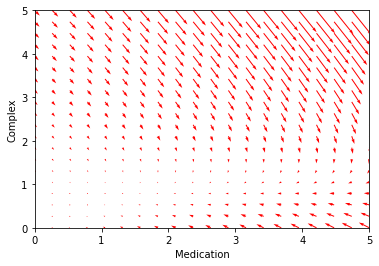

In [2]:
# https://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

# function that calculates dm/dt and dc/dt
def ddt(t, m, c, r0, kel, koff):
    dmdt = -m*(r0 - c) + c - (kel/koff) * m
    dcdt = m*(r0 - c) - c
    return [dmdt, dcdt]

# function that produces phase plane 
def pplane(t0, m_max, c_max, r0, kel, koff):
    # grid of values for m and c
    m = np.linspace(0, m_max, 20)
    c = np.linspace(0, c_max, 20)

    # matrices/arrays to save outcomes 
    M, C = np.meshgrid(m, c)
    u, v = np.zeros(M.shape), np.zeros(C.shape)

    # calculate values for grid of m,c
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            x = M[i,j]
            y = C[i,j]
            yprime = ddt(t0, x, y, r0, kel, koff)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]

    # plot phase plane 
    Q = plt.quiver(M, C, u, v, color = 'r')
    plt.xlim([0,m_max])
    plt.ylim([0,c_max])
    plt.xlabel('Medication')
    plt.ylabel('Complex')

# test function 
pplane(0, 5, 5, 1, 1, 1)
plt.savefig('Figures/Faseplaatjes/OrigineleModel.png', bbox_inches='tight')

In [3]:
# function for RK4 
def RK4_M(t0, m0, c0, r0, kel, koff, kon, tn, n):
    # step size 
    h = (tn - t0)/n
    
    # create vectors to save iterations 
    t = np.zeros(n+1) 
    t[0] = t0
    
    m = np.zeros(n+1)
    m[0] = m0
    
    c = np.zeros(n+1) 
    c[0] = c0
    
    # perform RK4
    for i in range(n):
        k1_m, k1_c = np.multiply(ddt(t[i], m[i], c[i], r0, kel, koff), h)
        k2_m, k2_c = np.multiply(ddt(t[i]+h/2, m[i]+k1_m/2, c[i]+k1_c/2, r0, kel, koff), h)
        k3_m, k3_c = np.multiply(ddt(t[i]+h/2, m[i]+k2_m/2, c[i]+k2_c/2, r0, kel, koff), h)
        k4_m, k4_c = np.multiply(ddt(t[i]+h, m[i]+k3_m, c[i]+k3_c, r0, kel, koff), h)
        k_m = (k1_m + 2*k2_m + 2*k3_m + k4_m)/6
        k_c = (k1_c + 2*k2_c + 2*k3_c + k4_c)/6
        
        # set and save values 
        t[i+1] = t[i] + h
        m[i+1] = m[i] + k_m
        c[i+1] = c[i] + k_c
        
    # translate values back to dimension-full variables
    t = t/koff
    m = m * koff/kon
    c = c * koff/kon
        
    return(t, m, c)

# function that creates graphs 
def sim_plot(t0, m0, c0, r0, kel, koff, kon, tn, n, maxaxis, counter, title, style):
    time, med, com = RK4_M(t0, m0, c0, r0, kel, koff, kon, tn, n)
    
    plt.figure(counter)
    plt.subplot(211)
    plt.plot(time, med, linestyle = style) # plotting medication 
    plt.title(title)
    plt.ylabel('Medication (mol/L)')
    plt.xticks(color='w')
    plt.xlim(0, max(time))
    plt.ylim(0, maxaxis)
    
    plt.subplot(212)
    plt.plot(time, com, linestyle = style) # plotting complex
    plt.xlabel('Time (s)')
    plt.ylabel('Complex (mol/L)')
    plt.xlim(0, max(time))
    plt.ylim(0, maxaxis)

Trying the functions: 

In [4]:
# set starting values 
t0 = 0
m0 = 1
c0 = 0
r0 = 1
kel = 1
koff = 1
kon = 1
tn = 2
n = 10

# try function 
RK4_M(t0, m0, c0, r0, kel, koff, kon, tn, n)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([1.        , 0.6949424 , 0.5121158 , 0.39540709, 0.31722092,
        0.26258956, 0.2228814 , 0.19291609, 0.1694971 , 0.1506092 ,
        0.13495744]),
 array([0.        , 0.13852963, 0.20216636, 0.22897654, 0.23641024,
        0.2333783 , 0.22474364, 0.21326437, 0.20053411, 0.18747603,
        0.17461798]))

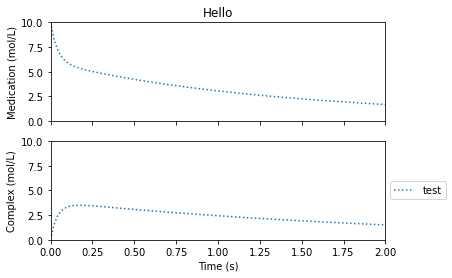

In [5]:
# set starting values 
t0 = 0
m0 = 1
c0 = 0
r0 = 1
kel = 1
koff = 10 
kon = 1
tn = 20
n = 100

# plot simulation 
sim_plot(t0, m0, c0, r0, kel, koff, kon, tn, n, 10, 100, "Hello", 'dotted')
plt.legend(['test'], loc = 'center left', bbox_to_anchor=(1, 0.5))
# plt.savefig('test.png', bbox_inches='tight')

## Performing simulation

### Simulations with varying starting concentrations

In [6]:
# starting values that stay the same throughout the simulations 
t0 = 0
c0 = 0
tn = 15
n = 1000

# starting concentrations 
m0 = np.linspace(1, 5, 5)
r0 = np.linspace(0.5, 5, 5)

# rates 
kel = np.linspace(1e-3, 1e3, 5) # de verhouding tussen kel/koff mag niet te groot worden, dan krijgen we nan values
koff = np.linspace(1e-3, 1e3, 5)
kon = np.linspace(1e-3, 1e3, 5)

# linestyles 
styles = ('solid', 'dashed', 'dotted', 'dashdot', 'solid')

# legends 
mlabels = [None] * 5
rlabels = [None] * 5

for i in range(5):
    mlabels[i] = '$m_0$ = ' + str(m0[i])
    rlabels[i] = '$r_0$ = ' + str(r0[i])

kellabels = [None] * 4
kofflabels = [None] * 4
konlabels = [None] * 4

for i in range(4):
    kellabels[i] = '$k_{el}$ = ' + str(round(kel[i]))
    konlabels[i] = '$k_{on}$ = ' + str(round(kon[i+1]))
    kofflabels[i] = '$k_{off}$ = ' + str(round(koff[i+1]))

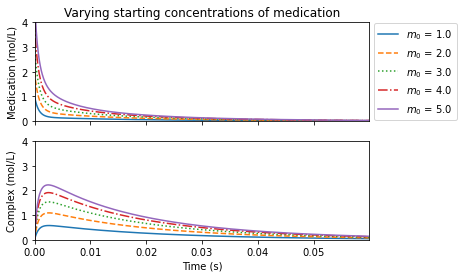

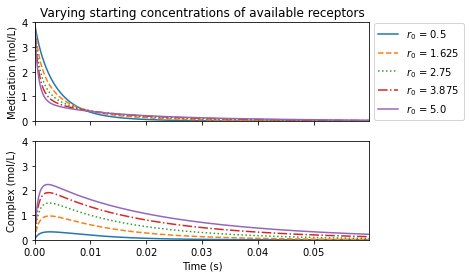

In [7]:
for i in range(5):
    # varieer m0
    sim_plot(t0, m0[i], c0, r0[3], kel[1], koff[1], kon[1], tn, n, 4, 0, 
             "Varying starting concentrations of medication", 
             styles[i]) 
    plt.legend(mlabels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/OrigineleModel/m0.png', bbox_inches='tight')
    
    # varieer r0
    sim_plot(t0, m0[3], c0, r0[i], kel[1], koff[1], kon[1], tn, n, 4, 1, 
             "Varying starting concentrations of available receptors", 
             styles[i]) 
    plt.legend(rlabels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/OrigineleModel/r0.png', bbox_inches='tight')
    

### Simulations with varying rates

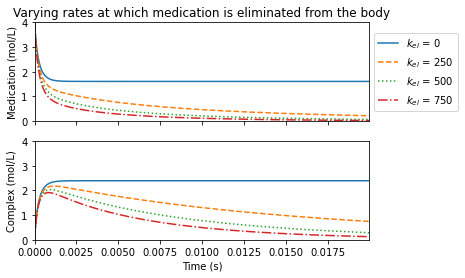

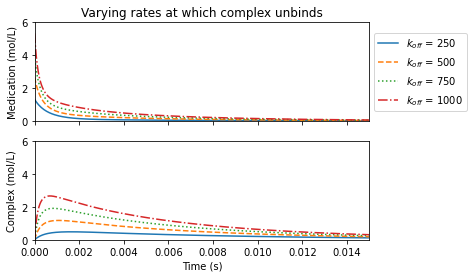

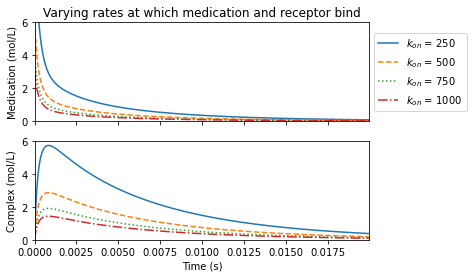

In [8]:
for i in range(4):
    # varieer kel
    sim_plot(t0, m0[3], c0, r0[3], kel[i], koff[3], kon[3], tn, n, 4, 2, 
             "Varying rates at which medication is eliminated from the body", styles[i])
    plt.legend(kellabels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/OrigineleModel/kel.png', bbox_inches='tight')
    
    # varieer koff
    sim_plot(t0, m0[3], c0, r0[3], kel[3], koff[i+1], kon[3], tn, n, 6, 3, 
             "Varying rates at which complex unbinds", styles[i]) 
    plt.legend(kofflabels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/OrigineleModel/koff.png', bbox_inches='tight')
    
    # varieer kon
    sim_plot(t0, m0[3], c0, r0[3], kel[3], koff[3], kon[i+1], tn, n, 6, 4, 
             "Varying rates at which medication and receptor bind", styles[i]) 
    plt.legend(konlabels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/OrigineleModel/kon.png', bbox_inches='tight')